In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from matplotlib.lines import Line2D

In [66]:
N = 19
# ring with the last atom missing
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/Overlap2023_01_19_22_26_58_L20_1',delimiter=',')
z0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/z_2023_01_19_22_26_58_L20_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zz_2023_01_19_22_26_58_L20_1',delimiter=',')
zzdata = zz0.reshape(len(z0),N,N)
z0_g = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zg_2023_01_19_22_26_58_L20_1',delimiter=',')
zz0_g=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zzg_2023_01_19_22_26_58_L20_1',delimiter=',')
zzdata_g = zz0_g.reshape(len(z0_g),N,N)

fN =20
# a full ring
fdata = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/Overlap2023_01_19_22_08_42_L20_1',delimiter=',')
fz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/z_2023_01_19_22_08_42_L20_1',delimiter=',')
fzz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zz_2023_01_19_22_08_42_L20_1',delimiter=',')
fzzdata = fzz0.reshape(len(fz0),fN,fN)
fz0_g = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zg_2023_01_19_22_08_42_L20_1',delimiter=',')
fzz0_g=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zzg_2023_01_19_22_08_42_L20_1',delimiter=',')
fzzdata_g = fzz0_g.reshape(len(fz0_g),fN,fN)

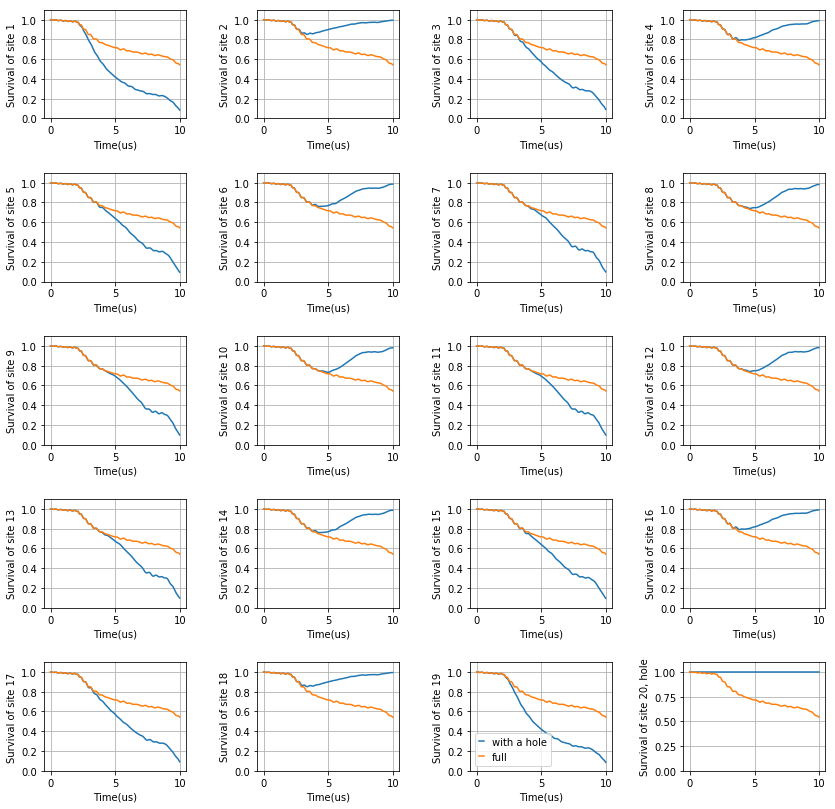

In [67]:
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(14,14))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z0[:,i]+1)/2
    fn = 1-(fz0[:,i]+1)/2
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='with a hole')
    ax[i//4,i%4].plot(fdata[0],fn,label='full')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_ylim([0,1.1])

    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
i=19    
ax[i//4,i%4].plot(data[0],np.ones(len(data[0])))
ax[i//4,i%4].set_ylim([0,1.1])
ax[i//4,i%4].grid()
ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1)+', hole')

fn = 1-(fz0[:,i]+1)/2
ax[i//4,i%4].plot(fdata[0],fn)


ax[4,2].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)

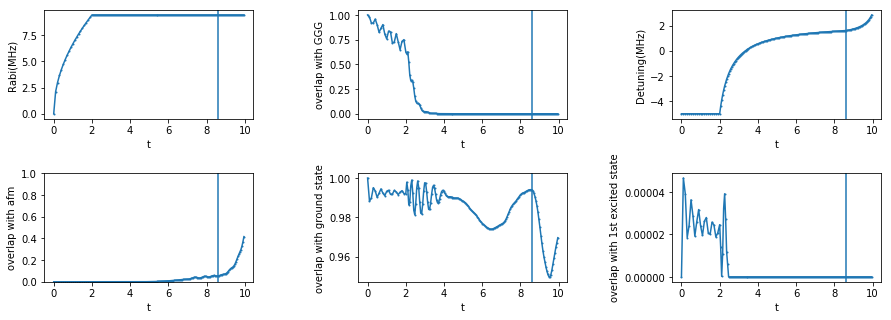

In [68]:
crit_id0 = 147
fig, ax = plt.subplots(2, 3, figsize=(15,5))
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')
for i in range(6):
    ax[i//3,i%3].axvline(data[0,crit_id0])

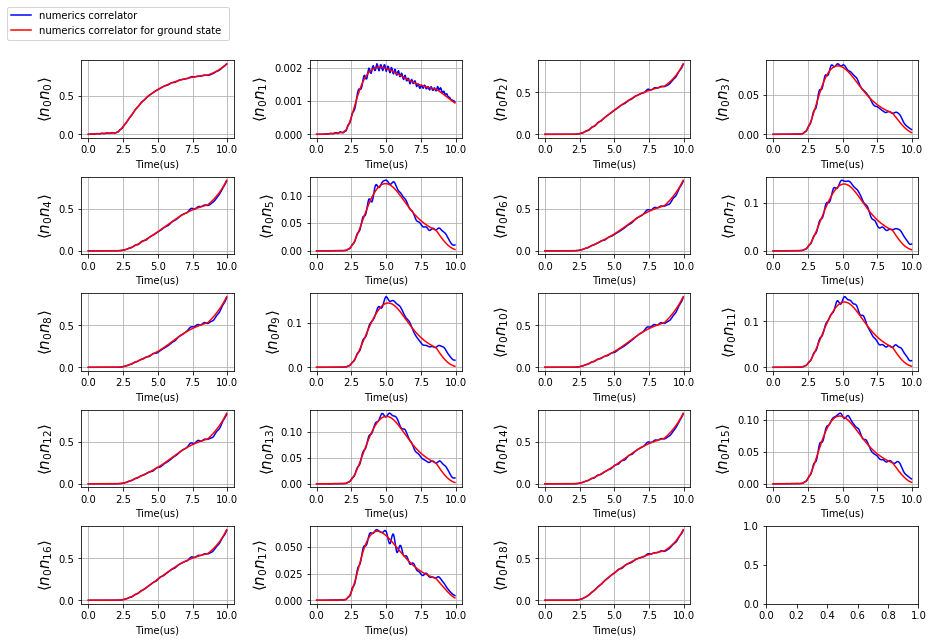

In [69]:
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
end = 0.5 

for i in range(N):
    n = 1-(z0[:,i]+1)/2  
    ng = 1- (z0_g[:,i]+1)/2 

    j = 0
    nn_sim = (zzdata[:,i,j]+z0[:,i]+z0[:,j]+1)/4
    nn_sim_c = nn_sim- (z0[:,i]+1)/2 *(z0[:,j]+1)/2
    ax[i//4,i%4].plot(data[0],nn_sim,label='numerics correlator ',color = 'b')
    nn_sim_g = (zzdata_g[:,i,j]+z0_g[:,i]+z0_g[:,j]+1)/4
    nn_sim_c_g = nn_sim_g- (z0_g[:,i]+1)/2 *(z0_g[:,j]+1)/2
    ax[i//4,i%4].plot(data[0],nn_sim_g,label='numerics correlator for ground state ',color = 'r')
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('$\langle n_0 n_{%d} \\rangle$'%i,fontsize=15)
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(1, 1.75))
plt.show()

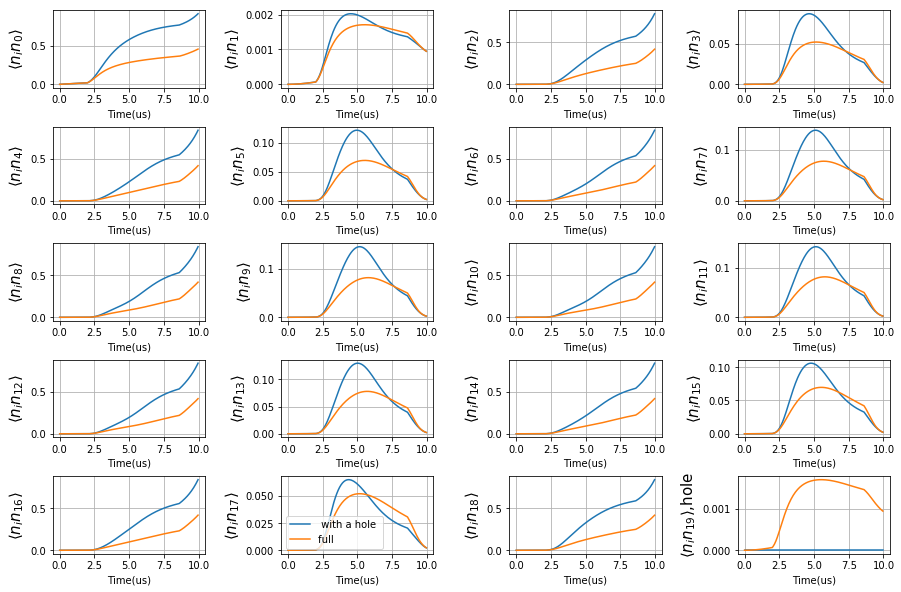

In [70]:
# if we thought there is site 19(last site)
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
tsteps = len(z0)
nn_sim_g = np.zeros([tsteps,20,20])
nn_sim = np.zeros([tsteps,20,20])
nn_sim_c = np.zeros([tsteps,20,20])
nn_sim_c_g = np.zeros([tsteps,20,20])

for j in range(N):
    for i in range(N):
        #for 19site
        n = 1-(z0[:,i]+1)/2  
        ng = 1- (z0_g[:,i]+1)/2 
        nn_sim[:,i,j] = (zzdata[:,i,j]+z0[:,i]+z0[:,j]+1)/4
        nn_sim_c[:,i,j] = nn_sim[:,i,j]- (z0[:,i]+1)/2 *(z0[:,j]+1)/2
    #    ax[i//4,i%4].plot(data[0],nn_sim,label='numerics correlator ',color = 'b')
        nn_sim_g[:,i,j] = (zzdata_g[:,i,j]+z0_g[:,i]+z0_g[:,j]+1)/4
        nn_sim_c_g[:,i,j] = nn_sim_g[:,i,j]- (z0_g[:,i]+1)/2 *(z0_g[:,j]+1)/2
        

        
    nn_sim[:,19,19] = 1
    nn_sim_g[:,19,19] = 1
    nn_sim_c[:,19,19] = 0
    nn_sim_g[:,19,19] = 0

    nn_sim[:,19,j] = 1-(z0[:,j]+1)/2
    nn_sim_g[:,19,j] = 1-(z0_g[:,j]+1)/2

    nn_sim_c[:,19,j] = 0
    nn_sim_c_g[:,19,j] = 0

j = 0 # we look at the correlator compared to site j

for k in range(20):
    fn = 1-(fz0[:,k]+1)/2  
    fng = 1- (fz0_g[:,k]+1)/2 
    fnn_sim = (fzzdata[:,k,j]+fz0[:,k]+fz0[:,j]+1)/4
    fnn_sim_c = fnn_sim- (fz0[:,k]+1)/2 *(fz0[:,k]+1)/2
    fnn_sim_g = (fzzdata_g[:,k,j]+fz0_g[:,k]+fz0_g[:,j]+1)/4
    fnn_sim_c_g = fnn_sim_g- (fz0_g[:,k]+1)/2 *(fz0_g[:,j]+1)/2
    ax[k//4,k%4].plot(data[0],nn_sim_g[:,j,k],label=' with a hole ')
    ax[k//4,k%4].plot(fdata[0],fnn_sim_g,label='full  ')

    ax[k//4,k%4].grid()
    ax[k//4,k%4].set_xlabel('Time(us)')
    ax[k//4,k%4].set_ylabel('$\langle n_i n_{%d} \\rangle$'%k,fontsize=15)
    if k == 19:
        ax[k//4,k%4].set_ylabel('$\langle n_i n_{%d} \\rangle$,hole'%k,fontsize=15)

# ax[0,0].legend(handlelength=0.5)
#ax[4,2].legend(bbox_to_anchor =(1, 1.75))
ax[4,1].legend()
plt.show()

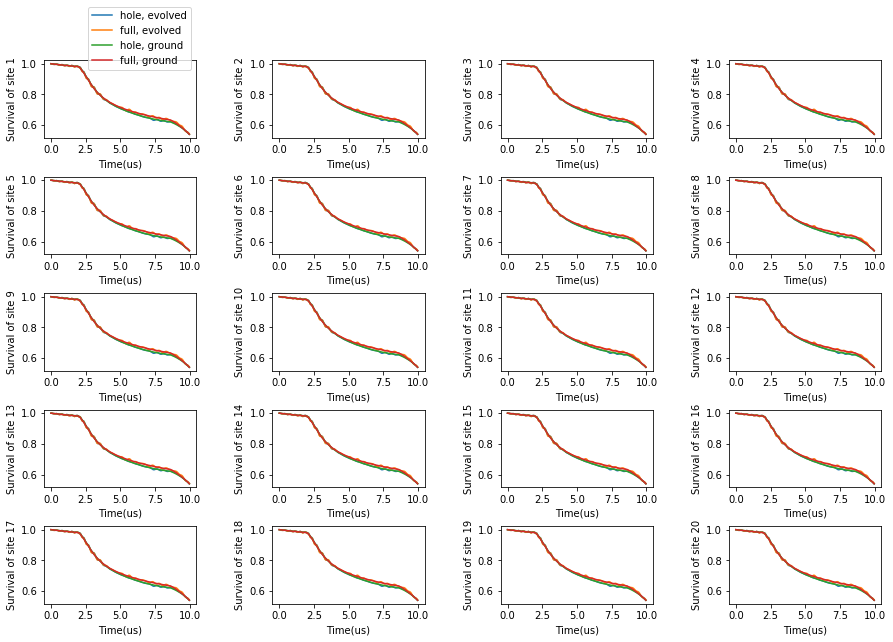

In [22]:
tsteps = len(z0)
new_z0 = np.zeros([tsteps,20])
new_z0_g = np.zeros([tsteps,20])

for i in range(tsteps):
    temp0 = np.append(z0[i],-1)
    temp0_g = np.append(z0_g[i],-1)

    for j in range(20):
        temp = np.roll(temp0,j)
        temp_g = np.roll(temp0_g,j)
        new_z0[i] += temp/20
        new_z0_g[i] += temp_g/20


        
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
end = 0.5 

for i in range(20):
    n = 1-(new_z0[:,i]+1)/2  
    n_g = 1-(new_z0_g[:,i]+1)/2  
    fn = 1-(fz0[:,i]+1)/2  
    fn_g = 1- (fz0_g[:,i]+1)/2 
    ax[i//4,i%4].plot(data[0],n,label='hole, evolved')
    ax[i//4,i%4].plot(fdata[0],fn,label='full, evolved ')
    ax[i//4,i%4].plot(data[0],n_g,label='hole, ground')
    ax[i//4,i%4].plot(fdata[0],fn_g,label='full, ground ')
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))

ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(1, 1.75))
plt.show()

In [71]:
tsteps = len(z0)
new_zzdata = np.zeros([tsteps,20,20]) # full zz data 
temp_new_zzdata = np.zeros([tsteps,20,20])
temp_zz = np.zeros([tsteps,20]) # the second index is the spacing

new_zzdata_g = np.zeros([tsteps,20,20]) # full zz data 
temp_new_zzdata_g = np.zeros([tsteps,20,20])
temp_zz_g = np.zeros([tsteps,20]) # the second index is the spacing
for i in range(tsteps):

    for j in range(19):
        temp = np.append(zzdata[i][j],-1*z0[i][j])
        temp_new_zzdata[i,j] = temp
        temp_g = np.append(zzdata_g[i][j],-1*z0_g[i][j])
        temp_new_zzdata_g[i,j] = temp_g
    temp_new_zzdata[i,19]= np.append((-1)*z0[i],(-1)*(-1))
    temp_new_zzdata = np.array(temp_new_zzdata)
    temp_new_zzdata_g[i,19]= np.append((-1)*z0[i],(-1)*(-1))
    temp_new_zzdata_g = np.array(temp_new_zzdata_g)


    # averaging over different position
    for j in range(20):# 
        temp_zz[i,j] = (np.trace(temp_new_zzdata[i],j) + np.trace(temp_new_zzdata[i],j-20))/20
        temp_zz_g[i,j] = (np.trace(temp_new_zzdata_g[i],j) + np.trace(temp_new_zzdata_g[i],j-20))/20

    for j in range(20):  
        new_zzdata[i,j] =np.roll(temp_zz[i,:],j)
        new_zzdata_g[i,j] =np.roll(temp_zz_g[i,:],j)




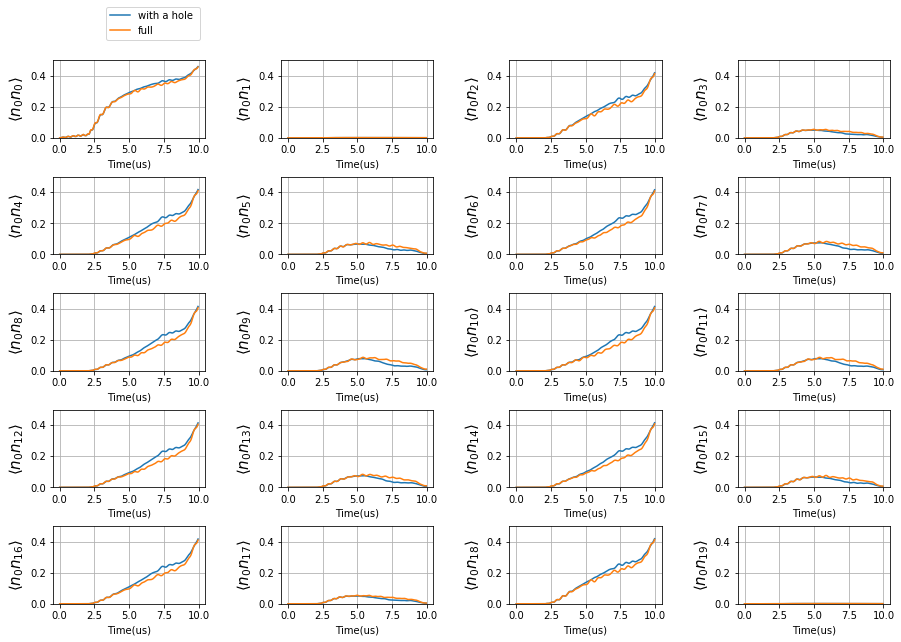

In [72]:
# consider the average effect 
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
end = 0.5 

for i in range(N+1):
    n = 1-(new_z0[:,i]+1)/2  
    ng = 1- (new_z0_g[:,i]+1)/2 

    j = 0
    nn_sim = (new_zzdata[:,i,j]+new_z0[:,i]+new_z0[:,j]+1)/4
    fnn_sim = (fzzdata[:,i,j]+fz0[:,i]+fz0[:,j]+1)/4

    nn_sim_c = nn_sim- (new_z0[:,i]+1)/2 *(new_z0[:,j]+1)/2
    ax[i//4,i%4].plot(data[0],nn_sim,label='with a hole ')
    ax[i//4,i%4].plot(fdata[0],fnn_sim,label='full')

#     nn_sim_g = (zzdata_g[:,i,j]+z0_g[:,i]+z0_g[:,j]+1)/4
#     nn_sim_c_g = nn_sim_g- (z0_g[:,i]+1)/2 *(z0_g[:,j]+1)/2
#     ax[i//4,i%4].plot(data[0],nn_sim_g,label='numerics correlator for ground state ',color = 'r')
    ax[i//4,i%4].set_ylim(0,0.5)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('$\langle n_0 n_{%d} \\rangle$'%i,fontsize=15)

ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(1, 1.75))
plt.show()

In [73]:
N = 20

In [74]:
sign = np.ones(N)
sign[0::2]=-1
sigma2_g = []
sigma_c_g = []
x = np.arange(N)
x = np.arange(N)
sigma_c = []
sigma2 = []
for t_id in range(len(data[0])):
    z_g = new_z0_g[t_id]
    zz_g = new_zzdata_g[t_id]
    n_g = (1-z_g)/2
    n_g_mean = np.mean(n_g)
    sigma_g = (n_g[:]-n_g_mean)*sign
    nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
    z = new_z0[t_id]
    zz = new_zzdata[t_id]
    n = (1-z)/2
    n_mean = np.mean(n)
    sigma = (n[:]-n_mean)*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    for i in x:
        temp_g = (-1)**i * (nn_g[0,i]-n_g_mean*n_g[0]-n_g_mean*n_g[i]+n_g_mean**2)
    
        sigma2_g.append(temp_g)
        sigma_c_g.append(temp_g-sigma_g[0]*sigma_g[i])
        temp =  (-1)**i * (nn[0,i]-n_mean*n[0]-n_mean*n[i]+n_mean**2)
        sigma2.append(temp)
        sigma_c.append(temp-sigma[0]*sigma[i])
sigma2_g = np.array(sigma2_g)
sigma2_g = sigma2_g.reshape(len(data[0]),20)
sigma2 = np.array(sigma2)
sigma2 = sigma2.reshape(len(data[0]),20)

In [75]:
sign = np.ones(N)
sign[0::2]=-1
fsigma2_g = []
fsigma_c_g = []
x = np.arange(N)
x = np.arange(N)
fsigma_c = []
fsigma2 = []
for t_id in range(len(data[0])):
    z_g = fz0[t_id]
    zz_g = fzz0_g[t_id].reshape(N,N)
    n_g = (1-z_g)/2
    n_g_mean = np.mean(n_g)
    sigma_g = (n_g[:]-n_g_mean)*sign
    nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
    z = fz0[t_id]
    zz = fzz0[t_id].reshape(N,N)
    n = (1-z)/2
    n_mean = np.mean(n)
    sigma = (n[:]-n_mean)*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    for i in x:
        temp_g = (-1)**i * (nn_g[0,i]-n_g_mean*n_g[0]-n_g_mean*n_g[i]+n_g_mean**2)
    
        fsigma2_g.append(temp_g)
        fsigma_c_g.append(temp_g-sigma_g[0]*sigma_g[i])
        temp =  (-1)**i * (nn[0,i]-n_mean*n[0]-n_mean*n[i]+n_mean**2)
        fsigma2.append(temp)
        fsigma_c.append(temp-sigma[0]*sigma[i])
fsigma2_g = np.array(fsigma2_g)
fsigma2_g = fsigma2_g.reshape(len(data[0]),20)
fsigma2 = np.array(fsigma2)
fsigma2 = fsigma2.reshape(len(data[0]),20)

In [76]:
def power_law(x, a, b):
    return a * x**b
crit_det = 1.6
crit_id0 = np.argmin(abs(data[1]-crit_det))
print(crit_id0)
print('crit time(us) = %3f'%data[0,crit_id0])
print('crit detuning(MHz) = %3f'%data[1,crit_id0])
print('Overlap with ground state at critical point = %3f'%data[5,crit_id0])

147
crit time(us) = 8.604000
crit detuning(MHz) = 1.601057
Overlap with ground state at critical point = 0.993985


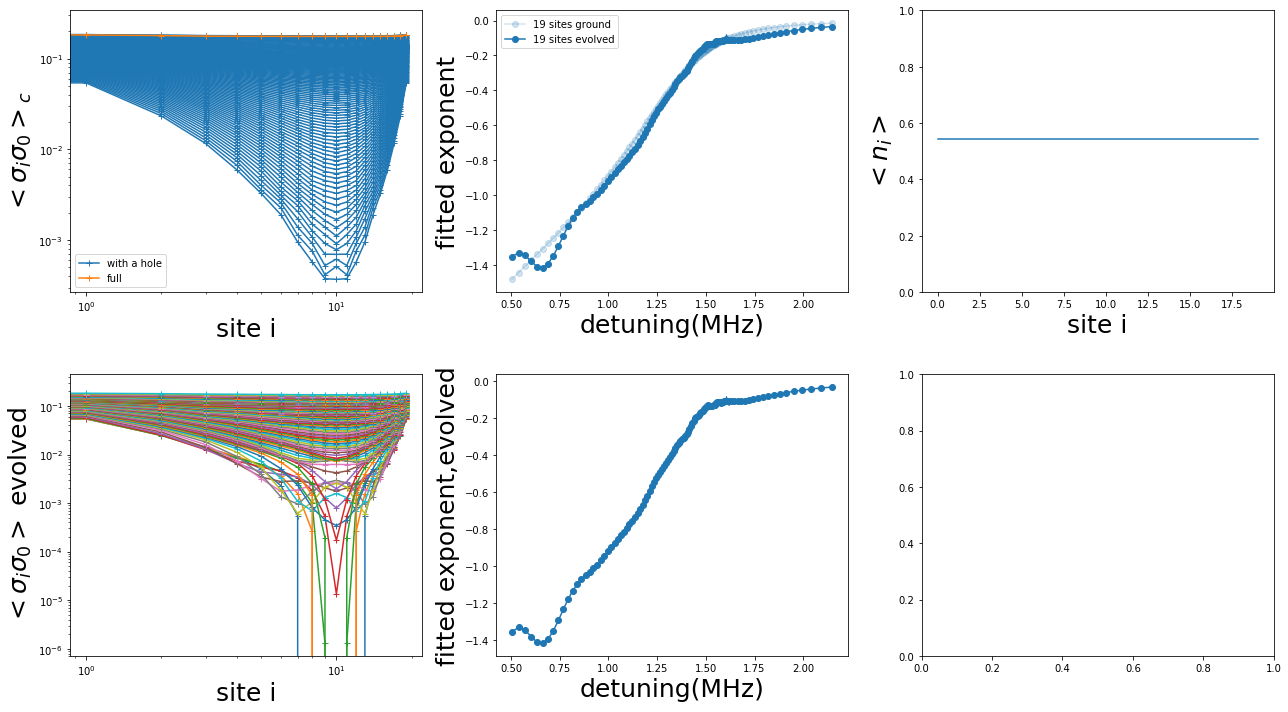

In [97]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(18,10))
detuning_list_g = []
exponent_list_g = []
exponent_list = []
for t_id in range(crit_id0-90,crit_id0+20,1):
    ax[0,0].plot(x,sigma2_g[t_id],marker = '+',color = 'C0')
    #ax[0,0].plot(x,fsigma2_g[t_id],marker = '+',color = 'C1')

    ax[1,0].plot(x,sigma2[t_id],label='evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')

    detuning_list_g.append(data[1,t_id])
    # define the power law function
    fit_range = 9
    # define the data points
    xdata = np.arange(1,fit_range)
    ydata = sigma2[t_id,1:fit_range]
    ydata_g = sigma2_g[t_id,1:fit_range]
    params, params_covariance = curve_fit(power_law, xdata, ydata)
    params_g, params_covariance_g = curve_fit(power_law, xdata, ydata_g)
    # evaluate the fitted power law function and plot it
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    exponent_list.append(params[1])

    yfit_g = power_law(xfit, params_g[0], params_g[1])
    exponent_list_g.append(params_g[1])
#     ax[0,0].plot(xfit, yfit_g, '-')
#     ax[1,0].plot(xfit, yfit, '-')

    if t_id == crit_id0:
        ax[0,1].scatter(data[1,t_id],params_g[1],s=100,color = 'C0',marker = '*',zorder = 2)
        ax[1,1].scatter(data[1,t_id],params[1],s=100,color = 'C0',marker = '*',zorder = 2)

ax[0,1].plot(detuning_list_g,exponent_list_g,marker = 'o',color = 'C0',zorder =1,label = '19 sites ground',alpha = 0.2)
ax[1,1].plot(detuning_list_g,exponent_list,marker = 'o',color = 'C0',zorder =1,label = '19 sites evolved')
ax[0,1].plot(detuning_list_g,exponent_list,marker = 'o',color = 'C0',zorder =1,label = '19 sites evolved')

ax[0,1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[0,1].set_ylabel('fitted exponent',fontsize = 25)
ax[0,1].legend()
ax[0,0].plot(x,sigma2_g[t_id],label='with a hole',marker = '+',color = 'C0')
ax[0,0].plot(x,fsigma2_g[t_id],label='full',marker = '+',color = 'C1')

ax[0,0].legend()


ax[1,0].set_xlabel('site i',fontsize = 25)
ax[1,0].set_ylabel('$<\sigma_i\sigma_0>$ evolved',fontsize = 25)
ax[1,1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1,1].set_ylabel('fitted exponent,evolved',fontsize = 25)

ax[0,0].set_xlabel('site i',fontsize = 25)
ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[0,2].plot(np.arange(0,N),n_g)
ax[0,2].set_ylim([0,1])
ax[0,2].set_xlabel('site i',fontsize = 25)
ax[0,2].set_ylabel('$<n_i>$',fontsize = 25)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')    
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')  
fig.tight_layout()
#plt.suptitle('ground state',fontsize=25,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

In [98]:
x1 = detuning_list_g
y1 = exponent_list_g
y2 = exponent_list

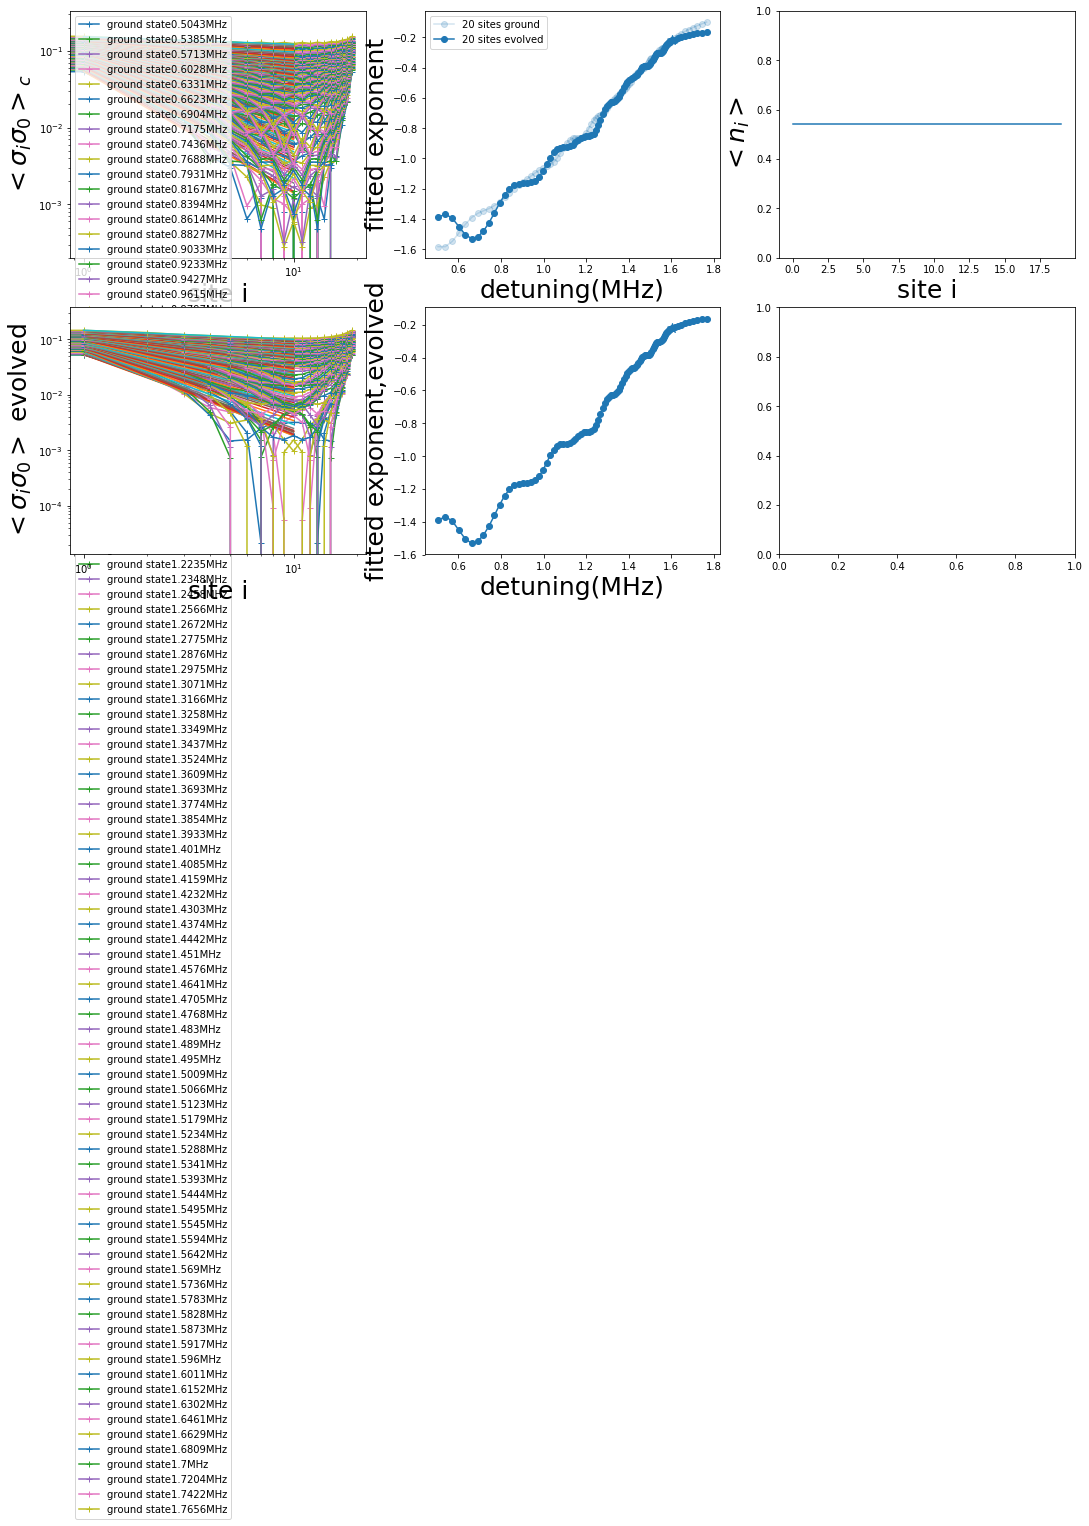

In [99]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(18,10))
detuning_list_g = []
exponent_list_g = []
exponent_list = []
for t_id in range(crit_id0-90,crit_id0+10,1):
    ax[0,0].plot(x,fsigma2_g[t_id],label='ground state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')
    ax[1,0].plot(x,fsigma2[t_id],label='evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')

    detuning_list_g.append(data[1,t_id])
    # define the power law function
    fit_range = 9
    # define the data points
    xdata = np.arange(1,fit_range)
    ydata = fsigma2[t_id,1:fit_range]
    ydata_g = fsigma2_g[t_id,1:fit_range]
    params, params_covariance = curve_fit(power_law, xdata, ydata)
    params_g, params_covariance_g = curve_fit(power_law, xdata, ydata_g)
    # evaluate the fitted power law function and plot it
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    exponent_list.append(params[1])

    yfit_g = power_law(xfit, params_g[0], params_g[1])
    exponent_list_g.append(params_g[1])
    ax[0,0].plot(xfit, yfit_g, '-')
    ax[1,0].plot(xfit, yfit, '-')

    if t_id == crit_id0:
        ax[0,1].scatter(data[1,t_id],params_g[1],s=100,color = 'C0',marker = '*',zorder = 2)
        ax[1,1].scatter(data[1,t_id],params[1],s=100,color = 'C0',marker = '*',zorder = 2)

ax[0,1].plot(detuning_list_g,exponent_list_g,marker = 'o',color = 'C0',zorder =1,label = '20 sites ground',alpha = 0.2)
ax[1,1].plot(detuning_list_g,exponent_list,marker = 'o',color = 'C0',zorder =1,label = '20 sites evolved')
ax[0,1].plot(detuning_list_g,exponent_list,marker = 'o',color = 'C0',zorder =1,label = '20 sites evolved')

ax[0,1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[0,1].set_ylabel('fitted exponent',fontsize = 25)
ax[0,1].legend()

ax[0,0].legend()


ax[1,0].set_xlabel('site i',fontsize = 25)
ax[1,0].set_ylabel('$<\sigma_i\sigma_0>$ evolved',fontsize = 25)
ax[1,1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1,1].set_ylabel('fitted exponent,evolved',fontsize = 25)

ax[0,0].set_xlabel('site i',fontsize = 25)
ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[0,2].plot(np.arange(0,N),n_g)
ax[0,2].set_ylim([0,1])
ax[0,2].set_xlabel('site i',fontsize = 25)
ax[0,2].set_ylabel('$<n_i>$',fontsize = 25)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')    
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')  
fig.tight_layout()
x2 = detuning_list_g
y3 = exponent_list_g
y4 = exponent_list
#plt.suptitle('ground state',fontsize=25,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

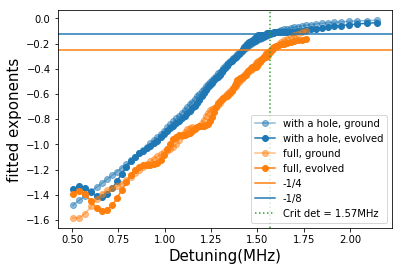

In [100]:
fs = 15
plt.plot(x1,y1,marker = 'o',color = 'C0',zorder =1,label = 'with a hole, ground',alpha = 0.5)
plt.plot(x1,y2,marker = 'o',color = 'C0',zorder =1,label = 'with a hole, evolved')
plt.plot(x2,y3,marker = 'o',color = 'C1',zorder =1,label = 'full, ground',alpha = 0.5)
plt.plot(x2,y4,marker = 'o',color = 'C1',zorder =1,label = 'full, evolved')
plt.xlabel('Detuning(MHz)',fontsize = fs)
plt.ylabel('fitted exponents',fontsize = fs)
plt.axhline(-0.25,color = 'C1',label = '-1/4')
plt.axhline(-0.125,color = 'C0',label = '-1/8')
plt.axvline(1.57, ls = ':', label = 'Crit det = 1.57MHz',color = 'C2')
plt.legend()